In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression   
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd

df = pd.read_csv('dataset/convert_number_data_17.csv')


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         26304 non-null  float64
 1   bodyType                 26304 non-null  int64  
 2   brand                    26304 non-null  int64  
 3   cargoVolume              26304 non-null  float64
 4   curbWeight               26304 non-null  float64
 5   driveWheelConfiguration  26304 non-null  int64  
 6   eLabel                   26304 non-null  int64  
 7   emissionsCO2             26304 non-null  float64
 8   engineCapacity           26304 non-null  float64
 9   fuelCapacity             26304 non-null  float64
 10  fuelConsumption          26304 non-null  float64
 11  height                   26304 non-null  float64
 12  length                   26304 non-null  float64
 13  model                    26304 non-null  int64  
 14  modelDate             

In [7]:
features_to_plot = ['price','curbWeight','engineCapacity','fuelCapacity','length','speed', 'torque','vEengineDisplacement', 'vEenginePower', 'weightTotal','wheelbase','width']
df = df[features_to_plot]

X = df.drop('price', axis=1)
# price column
y = np.log(df['price'])
# y = df['price']

In [8]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [10]:
# feature scale the X_train and X_test values

norm = StandardScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)

print(X_train)
print('\n')
print(X_test)

[[ 0.74512226  0.64639712 -0.09885464 ...  1.26919549 -0.0994536
   1.60347686]
 [-0.69601444 -0.56603213  0.1991823  ... -0.81816958 -0.80713797
  -1.04255702]
 [ 1.6422806   0.20892265  1.2919844  ...  1.59281798  1.21941272
   1.70359706]
 ...
 [ 0.35946596 -0.56394891  0.79525617 ...  0.54104489  1.05857536
   0.38773157]
 [ 0.98869466  1.30469204  0.29852794 ...  0.39541476  0.22222111
   0.08737096]
 [ 1.49207762  2.75669065  1.19263875 ...  1.43100674  0.897738
   1.11717874]]


[[-0.49303744 -1.81179276 -0.79427415 ... -0.34891697  0.06138375
   0.34482291]
 [-1.20345694 -1.499311   -0.29754593 ... -1.2226977  -0.64630061
  -1.08546568]
 [-0.78938386 -0.5785314  -0.49623722 ... -0.44600372 -0.16378854
  -0.04135501]
 ...
 [ 1.53673256  2.31296654  1.19263875 ...  1.31773887  1.88206262
   1.10287586]
 [ 0.08747678  0.26933579  0.39787359 ...  0.00706777  0.28655605
   0.31621714]
 [-0.16827424 -0.64311096 -0.49623722 ...  0.07179227  0.70473318
   0.93124123]]


In [11]:
# Fitting linear regression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [12]:
# fitting knn
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [13]:

rf = RandomForestRegressor(random_state = 123 , max_depth = 45 , n_estimators = 600)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=45, n_estimators=600, random_state=123)

In [14]:
# fit decision tree
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

TRAIN SCORE

In [15]:
train_score = pd.DataFrame({
    'model': ['LinearRegressor', 'KNeighborsRegressor', 'DecisionTree', 'RandomForestRegressor'],

    'score': [linear.score(X_train, y_train), knn.score(X_train, y_train), dtr.score(X_train, y_train), rf.score(X_train, y_train),
              ]
    })
train_score

,model,score
0,LinearRegressor,0.890397
1,KNeighborsRegressor,0.968845
2,DecisionTree,0.989111
3,RandomForestRegressor,0.987044


In [16]:
linear_pred = np.exp(linear.predict(X_test))
knn_pred = np.exp(knn.predict(X_test))

rf_pred = np.exp(rf.predict(X_test))
dtr_pred = np.exp(dtr.predict(X_test))

y_test = np.exp(y_test)

EVALUATION TEST

In [23]:
best_model = pd.DataFrame({
  'model': ['LinearRegressor', 'KNeighborsRegressor', 'DecisionTree', 'RandomForestRegressor'],
  'mae' : [mean_absolute_error(y_test, linear_pred), mean_absolute_error(y_test, knn_pred), mean_absolute_error(y_test, dtr_pred), mean_absolute_error(y_test, rf_pred)],
  'mse' : [mean_squared_error(y_test, linear_pred), mean_squared_error(y_test, knn_pred), mean_squared_error(y_test, dtr_pred), mean_squared_error(y_test, rf_pred)],
  'rmse' : [np.sqrt(mean_squared_error(y_test, linear_pred)), np.sqrt(mean_squared_error(y_test, knn_pred)), np.sqrt(mean_squared_error(y_test, dtr_pred)), np.sqrt(mean_squared_error(y_test, rf_pred))],
  'r2_score' : [r2_score(y_test, linear_pred), r2_score(y_test, knn_pred), r2_score(y_test, dtr_pred), r2_score(y_test, rf_pred)]
  
})
best_model

,model,mae,mse,rmse,r2_score
0,LinearRegressor,4.302871,38.936822,6.239938,0.864132
1,KNeighborsRegressor,2.693306,17.239774,4.152081,0.939843
2,DecisionTree,2.759471,19.163138,4.377572,0.933131
3,RandomForestRegressor,2.431917,13.421371,3.663519,0.953167


In [18]:
# cat boost regressor
for i in range(5):
    y = list(y_test)[i]
    y_pre = list(rf_pred)[i]
    print(f'Real price:    {y}')
    print(f'Predict price: {y_pre}\n\n')

Real price:    27.479999999999997
Predict price: 31.052517868668172


Real price:    15.189999999999998
Predict price: 16.466068838613616


Real price:    23.994999999999994
Predict price: 22.05641983195047


Real price:    41.219999999999985
Predict price: 40.59412775932304


Real price:    63.42000000000001
Predict price: 68.0766506483657




In [19]:
import matplotlib.pyplot as plt

In [20]:
def plot_result(y_pred, y_true, low=0, num=500, model=None):
    y_pred = y_pred[low:low+num]
    y_true = y_true[low:low+num]
    plt.figure(figsize=(16, 12), dpi=100)
    idx = np.array([_ for _ in range(len(y_true))])
    plt.plot(idx, y_true, label='TrueResult')
    plt.plot(idx, y_pred, label='Predict')
    plt.legend()
    if model is not None:
        plt.title(model)
    else:
        model = ""
    plt.show()
    plt.savefig(f'image/result_model_{model}.png', dpi=120)


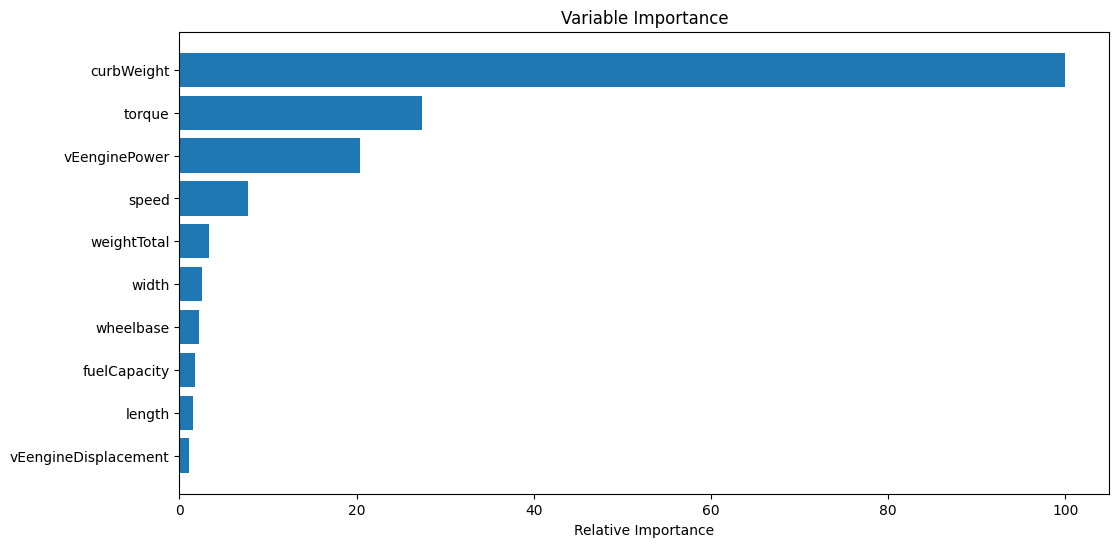

In [22]:
# fearure importance of decision tree regressor
feature_importance = dtr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [21]:
feature_importance

array([8.24495719e-01, 9.01863997e-01, 3.11118266e-01, 5.17597740e-01,
       1.00000000e+02, 2.09401377e+00, 1.22808761e-01, 3.36054407e-01,
       1.99358571e-01, 6.30283785e-01, 3.96336702e-01, 1.86980307e+00,
       6.14364848e-01, 1.03268899e+00, 1.60951903e+00, 7.72982666e-02,
       3.57450490e+00, 4.27230287e-01, 3.45016957e-01, 2.98074619e+00,
       2.14418257e+00, 2.53986963e+01, 2.89862057e-01, 1.84649029e+01,
       2.70976720e-01, 4.89996942e-01, 6.68468697e-01, 1.45799152e+00])